# follow-trend

    1. S&P 500 index closes above its 200 day moving average
    2. The stock closes above its upper band, buy
    
    1. S&P 500 index closes below its 200 day moving average
    2. The stock closes below its lower band, sell your long position.
    
    (Compare the result of applying same strategy to Multiple securities.)

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf
import strategy

# Format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
capital = 10000
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.now()

Define symbols

In [4]:
SP500_Sectors = ['SPY', 'XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']

Other_Sectors = ['RSP', 'DIA', 'IWM', 'QQQ', 'DAX', 'EEM', 'TLT', 'GLD', 'XHB']

Elite_Stocks  = ['ADP', 'BMY', 'BRK-B', 'BTI', 'BUD', 'CL', 'CLX', 'CMCSA', 'DIS', 'DOV']
Elite_Stocks += ['GIS', 'HD', 'HRL', 'HSY', 'INTC', 'JNJ', 'K', 'KMB', 'KMI', 'KO']
Elite_Stocks += ['LLY', 'LMT', 'MCD', 'MO', 'MRK', 'MSFT', 'NUE', 'PG', 'PM', 'RDS-B']
Elite_Stocks += ['SO', 'T', 'UL', 'V', 'VZ', 'XOM']

# Pick one of the above
symbols = SP500_Sectors

In [5]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'sma_period': 200,
    'percent_band' : 0,
    'use_regime_filter' : True
}

Run Strategy

In [6]:
strategies = pd.Series(dtype=object)
for symbol in symbols:
    print(symbol, end=" ")
    strategies[symbol] = strategy.Strategy(symbol, capital, start, end, options)
    strategies[symbol].run()

SPY XLB XLE XLF XLI XLK XLP XLU XLV XLY 

Summarize results

In [7]:
metrics = ('start',
           'annual_return_rate',
           'max_closed_out_drawdown',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'annual_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = pf.optimizer_summary(strategies, metrics)
pd.set_option('display.max_columns', len(df.columns))
df

,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
start,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03,2000-01-03
annual_return_rate,4.07,2.62,6.68,5.26,5.29,5.99,1.33,1.08,2.29,5.43
max_closed_out_drawdown,-23.35,-33.51,-29.99,-26.12,-20.53,-38.11,-21.95,-33.14,-29.56,-26.25
sharpe_ratio,0.42,0.26,0.52,0.46,0.49,0.49,0.20,0.16,0.27,0.50
sortino_ratio,0.44,0.28,0.53,0.49,0.53,0.50,0.21,0.16,0.28,0.53
monthly_std,2.94,3.48,3.96,3.40,3.18,3.69,2.13,2.81,2.81,3.24
annual_std,10.12,11.34,13.93,11.61,11.49,12.24,6.46,8.24,10.83,11.47
pct_time_in_market,70.48,58.01,50.72,59.35,63.69,65.50,60.92,56.01,61.50,64.64
total_num_trades,78,93,85,86,96,87,109,109,102,83
pct_profitable_trades,24.36,16.13,38.82,27.91,20.83,34.48,30.28,35.78,20.59,26.51


In [8]:
# Averages
avg_annual_return_rate = df.loc['annual_return_rate'].mean()
avg_sharpe_ratio = df.loc['sharpe_ratio'].mean()
print('avg_annual_return_rate: {:.2f}'.format(avg_annual_return_rate))
print('avg_sharpe_ratio:       {:.2f}'.format(avg_sharpe_ratio))

avg_annual_return_rate: 4.00
avg_sharpe_ratio:       0.38


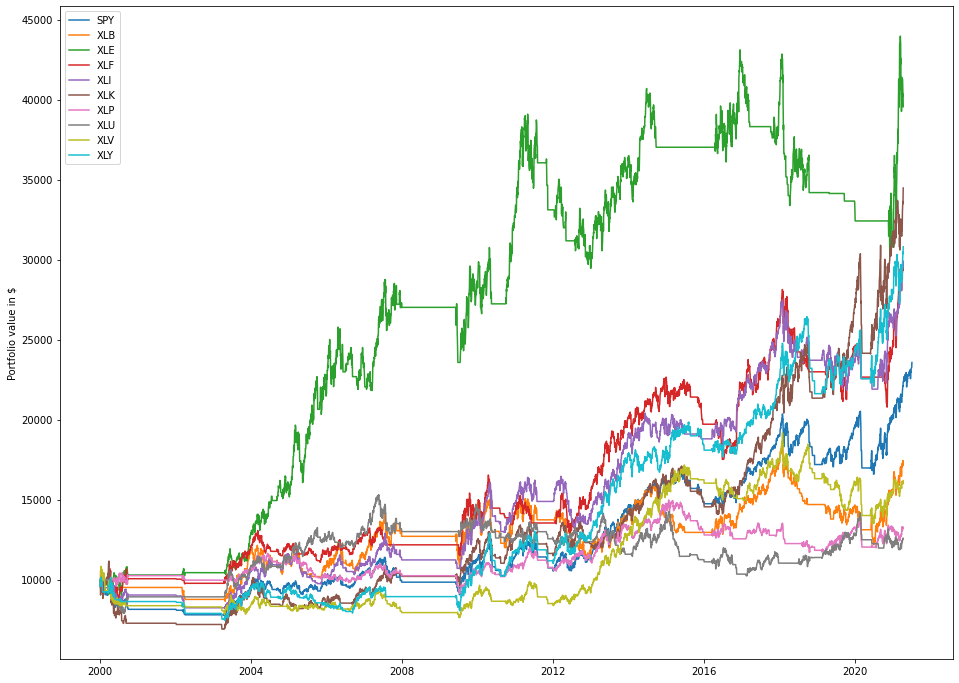

In [9]:
pf.plot_equity_curves(strategies)